In [145]:
import json
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os, glob
from IPython.display import JSON

In [2]:
# set resources paths
annotations_path = '/localhome/mathias/annotations/annotations_2021-09-22/instances_combined.json'
img_dir = '/hdd/EFI/imgs-all'
metadata_path = '/hdd/EFI/metadata/csv/combined.csv'

In [134]:
# load annotations and metadata
with open(annotations_path) as f:
    coco_json = json.load(f)
metadata = pd.read_csv(metadata_path)
category_id_to_name = {cat['id']: cat['name'] for cat in coco_json['categories']}

In [140]:
def show_boxes(img_name):
    img = next(img for img in coco_json['images'] if img['file_name'] == img_name)
    anns = [ann for ann in coco_json['annotations'] if ann['image_id'] == img['id']]
    return anns

In [136]:
def vis_by_idx(img_idx):
    cur_img = coco_json['images'][img_idx]
    fn = cur_img['file_name']
    print(fn)
    vis_img_and_meta(cur_img['file_name'])
    return fn

In [109]:
def vis_img_and_meta(img_name):
    plt.tight_layout()
    fig = plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(1,2, width_ratios=[1.5,.5])
    ax0 = plt.subplot(gs[0])
    ax0.axis('off')
    ax1 = plt.subplot(gs[1])
    ax1.axis('off')
    img_path = f'{img_dir}/{img_name}'
    img = [img for img in coco_json['images'] if img['file_name'] == img_name][0]
    cur_anns = [ann for ann in coco_json['annotations'] if ann['image_id'] == img['id']]
    img = cv2.imread(img_path)
    for ann in cur_anns:
        [x,y,w,h] = ann['bbox']
        name = category_id_to_name[ann['category_id']]
        img = cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (255,255,0), 2)
        img = cv2.putText(img, name, (int(x) + 5, int(y) + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 1)
    ax0.imshow(img[:,:,::-1], aspect='equal')
    
    meta = metadata[metadata['File Name'].str.contains(img_name, na=False)]
    if len(meta) > 0:
        meta = meta[['File Name','Artist','Title','Earliest Date','Latest Date']]
        tbl = ax1.table(cellText=meta.T.values, rowLabels=meta.T.index, loc='center',colWidths=[1,5])
        tbl.scale(2,5)
        tbl.auto_set_column_width([0,1])
    fig.tight_layout()
    plt.show()

In [78]:
img_idx = 0

In [1]:
fn = vis_by_idx(img_idx)
print(img_idx)
img_idx += 1

NameError: name 'vis_by_idx' is not defined

In [146]:
JSON(show_boxes(fn))

<IPython.core.display.JSON object>

<Figure size 432x288 with 0 Axes>

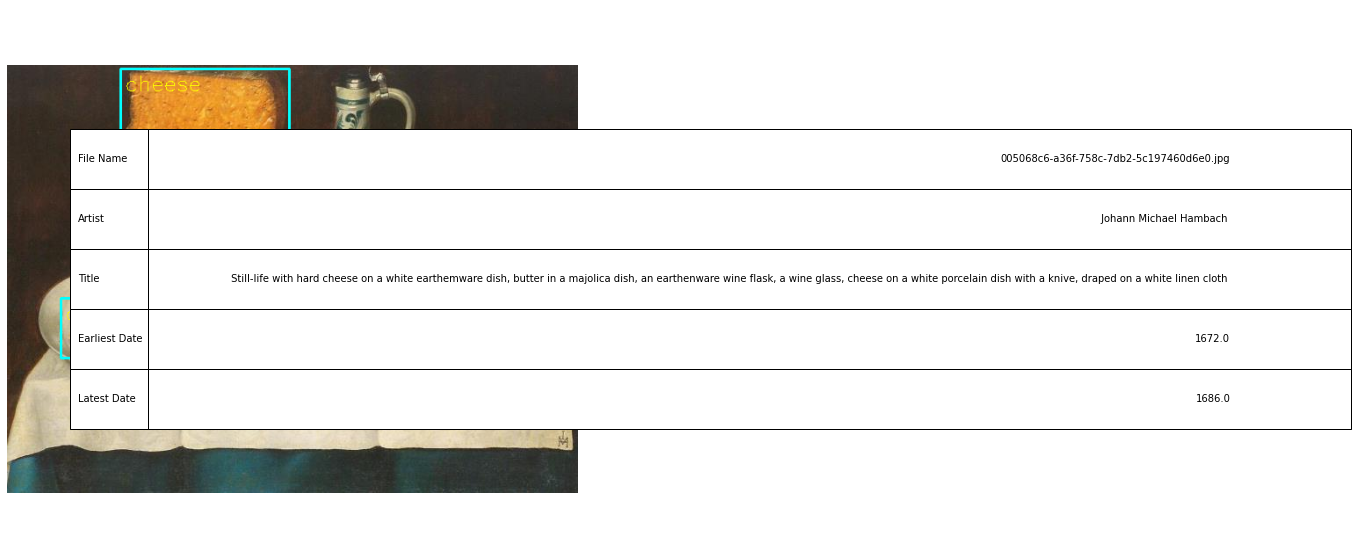

In [133]:
vis_img_and_meta('005068c6-a36f-758c-7db2-5c197460d6e0.jpg')